###  Created by Luis A. Sanchez-Perez (alejand@umich.edu)

**NOTE:** Before modifying any of the provided code cells verify you will meet the requirements from each question. Also, do not modify any of the indicated cells.

In this notebook we will be creating a simple k-NN implementation from scratch. You implementation should:
* Use continous features
* Perform classification only (no regression)
* Use Eucledian distance (or square of the Eucledian distance to avoid computing the squared root) and exhautive search for neighbors determination.
* Allow the use of weights (if desired)

In short the algorithm can be described as follows:

#### Algorithm
1. Load the data.
2. Initialize k to your chosen number of neighbors.
3. For each example in the data:
    * Calculate the distance between the query example and the current example from the data.
    * Add the distance and the index of the example to an ordered collection.
    * Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances.
    * Pick the first k entries from the sorted collection.
4. Get the labels of the selected k entries.
5. If no weights are used, return the mode of the k labels.
6. If weights are used, return the class with highest cummulative weight.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import distance
from statistics import mode
import math
import time

## Part I - Implementing the classifier

**Question 1.** In this part you will implement the k-NN classifier from scratch. Your task is to complete the `KNNClassifier` class definition.

#### Weights computation
For weighting the $k$ nearest neighbor based on its distance to the query point use the following equation:

$$ w_k = 1/(1+d_k) $$

where $w_k$ is the weight for the $k$ neighbor and $d_k$ is the Eucledian distance from the query point to the $k$ neighbor

#### Considerations and requirements
* Do not modify the method `__init__` from `KNNClassifier`.
* Do not modify the signature of the method `predict` from `KNNClassifier`.
* The method `predict` receives an array of size `m x n` (`m` observations and `n` features) and returns an array of size `m`  with the class for each of the `m` observations.
* You are free to add any methods to the class `KNNClassifier` definition.
* Your implementation should use weights if the parameter `weighted` of the `__init__` method is true.

In [2]:
# ---------------- COMPLETE THIS IMPLEMENTATION -----------------------
class KNNClassifier:
    def __init__(self, k, predictors, responses, weighted=True):
        self.k = k;
        self.predictors = predictors
        self.responses = responses
        self.weighted = weighted
    
    def predict(self, query: np.ndarray) -> np.ndarray:
        
        ## Initialize and calculate distance vector
        cols = 9
        rows = 1
        d = np.array([[None] * cols] * rows)
        for i in list(range(9)):
            d[0, i] = distance.euclidean((knn.predictors[i, 0], knn.predictors[i, 1]), (query[0, 0], query[0, 1]))

        ## Sort Array
        cols = 9
        rows = 4
        A = np.array([[None] * cols] * rows)
        A[0, :] = np.sort(d) #distance
        A[1, :] = np.argsort(d[0, :]) #original index
        A[2, :] = y[list(A[1, :])] #classes
        A[3, :] = 1 / (1 + (A[0, :])) #weights

        ## Select Neighbors
        k = knn.k
        selected_entries = A[:, 0:k]

        ## Compute class
        if knn.weighted == False:
            majority_vote = mode(selected_entries[2, :])
            final_label = np.array(majority_vote,ndmin=1)
        else:
            sorted_classes = selected_entries[2, :]
            sorted_weights = selected_entries[3, :]
            weights_zero = sorted_weights[sorted_classes == 0]
            cum_weight_zero = sum(weights_zero)
            weights_one = sorted_weights[sorted_classes == 1]
            cum_weight_one = sum(weights_one)
            if cum_weight_zero > cum_weight_one:
                final_label = np.array([0],ndmin=1)
            else:
                final_label = np.array([1],ndmin=1)
                
        return final_label
    
# ---------------------------------------------------------------------

In [3]:
# Creating a toy dataset. Do not modify this cell!
X = np.array([
    [1,1],
    [1,2],
    [1,4],
    [2,3],
    [3,0],
    [3,2],
    [3,5],
    [4,4],
    [5,3]
])
y = np.array([1,0,0,1,1,1,0,0,0])
query = np.array([1,2],ndmin=2)

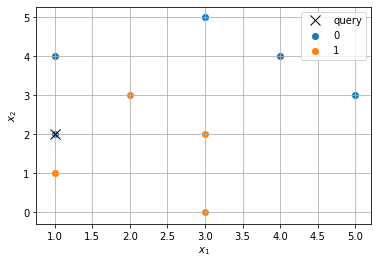

In [4]:
# Plots dataset and query point. Do not modify this cell!
for label in np.unique(y):
    plt.scatter(X[y==label,0], X[y==label,1], label=label)
plt.plot(query[:,0], query[:,1],'kx', markersize=10,label='query')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid()
plt.show()

### Unit test
Below a k-NN classifier is created with $k=3$.

If your implementation is correct the model should estimate the query point belongs to class 1.

**Side note:** Notice the query point [1,2] is in the dataset.

In [5]:
# Do not modify this cell!
knn = KNNClassifier(3,X,y,weighted=False)
y_pred = knn.predict(query)
print('Estimated class: ', end='')
if y_pred is not None:
    print(y_pred[0])
else:
    print('Not implemented yet! Please finish the KNNClassifier implementation')

Estimated class: 1


### Unit test
Below a k-NN classifier is created with $k=3$.

If your implementation is correct the model should estimate the query point belongs to class 0.

In [6]:
# Do not modify this cell!
knn = KNNClassifier(3,X,y,weighted=True)
y_pred = knn.predict(query)
print('Estimated class: ', end='')
if y_pred is not None:
    print(y_pred[0])
else:
    print('Not implemented yet! Please finish the KNNClassifier implementation')

Estimated class: 0


## Part II - Analyzing some of the classifier params

In [7]:
# Creates simulated dataset. Do not modify this cell!
X,y = make_circles(noise=0.3, factor=0.5, random_state=1,n_samples=300)

### Generate a simulated dataset
Below a binary classification dataset is generated and plot. As shown in the graph both classes are not perfectly separable using only those two features. This makes challenging the definition of a "meaninful" boundary between both classes.

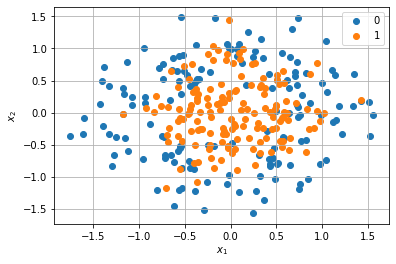

In [8]:
# Plots dataset. Do not modify this cell!
for label in np.unique(y):
    plt.scatter(X[y==label,0], X[y==label,1], label=label)
plt.legend()
plt.grid()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
range_x1 = plt.xlim()
range_x2 = plt.ylim()
plt.show()

In [9]:
# Generates auxiliary grid for plotting. Do not modify this cell!
pts = 200
x1 = np.linspace(range_x1[0], range_x1[1], pts)
x2 = np.linspace(range_x2[0], range_x1[1], pts)
X1, X2 = np.meshgrid(x1,x2)
grid = np.array([X1.ravel(), X2.ravel()]).T

### Trying different k-NN versions
Below you can observe the resulting boundary found by different k-NN classifiers for the given dataset. A k-NN classifier is created for every value of $k$ in `nearest` using the implementation available in the `sciki-learn` library [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

**Side note:** In order to generate the plots you see below the `400000` points of the `200 x 200` grid have to be classified by each k-NN model. Since we are using a naive search (exhaustive comparison) with a `300` observations dataset, a total of `300 x 200 x 200` distance computations must be performed by each classifier. Which is quite an expensive way to perform such a simple classification. As such, the generation of these plots take quite a bit of time.

Time elapsed to plot: 11.674962399999998


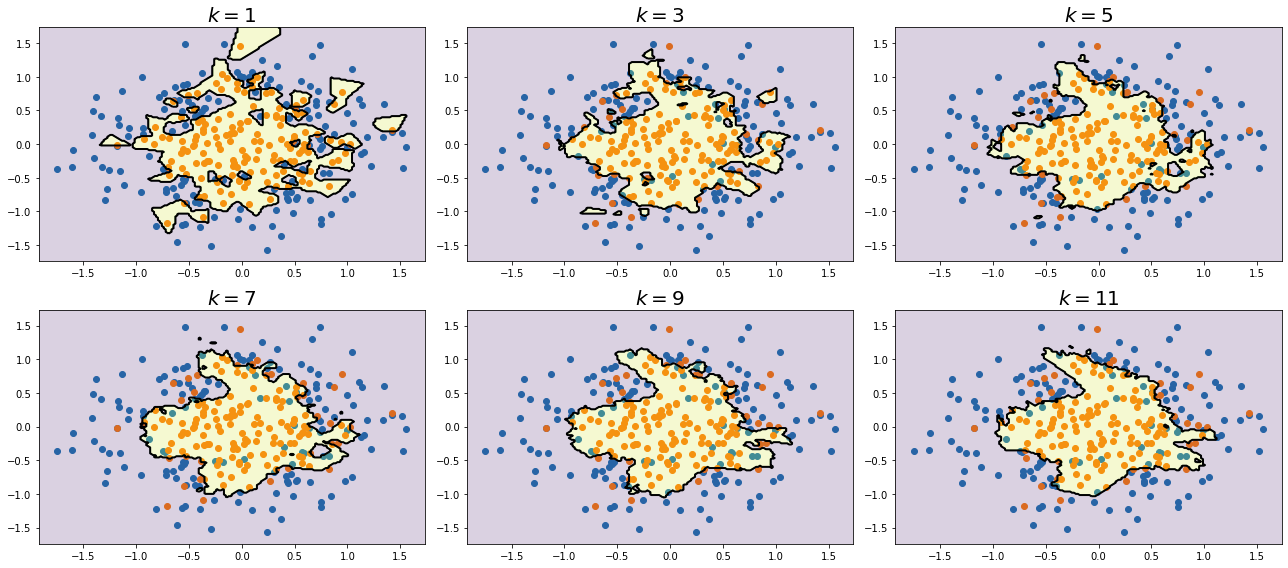

In [10]:
# Defines k-NN classifiers using different values for k. Do not modify this cell!
nearest = [1,3,5,7,9,11]
n = 3
m = math.ceil(len(nearest) / n)
fig, axes = plt.subplots(m,n)
fig.set_size_inches(6*n,4*m)
fig.set_tight_layout(True)
start = time.perf_counter()
for i, ax in enumerate(axes.ravel()):
    if i < len(nearest):
        knn = KNeighborsClassifier(n_neighbors=nearest[i], algorithm='brute') # change algorithm='kd_tree' (for fun!!!)
        knn.fit(X, y)
        y_pred = knn.predict(grid)
        for label in np.unique(y):
            ax.scatter(X[y==label,0], X[y==label,1], label=label)
        ax.contourf(X1, X2, y_pred.reshape(X1.shape), alpha = 0.20)
        ax.contour(X1, X2, y_pred.reshape(X1.shape), levels=[0.5], colors='k',linewidths=2)
        ax.set_title('$k={}$'.format(nearest[i]),fontsize=20)
    else:
        fig.delaxes(ax)
print('Time elapsed to plot: {}'.format(time.perf_counter() - start))
plt.show()

**Question 2.** Based on the code and results shown in the cell above. What can you tell about the results? Write you answer in the markdown cell below.

**Answer.** In part II we are trying to divide our domain into two distinct regions, based on what class a query point would be if it were to be placed in either of the two regions. 

This is done by checking which class (1/orange or 0/blue) has more representatives amongst the k nearest neighbors of each grid point.

You can see from the plots above that the region (collection of grid points) for which the k nearest neighbors belong to class 1 (orange) is highligted in yellow.

Because of this, when k=1 each orange point has an associated 'yellow' region. Since there are inevitably going to be grid points where the closest data point belongs to class 1 (is orange).

As the value of k increases, the yellow region shrinks towards the center of the domain. This makes sense as the orange points are clustered in the center of the domain and for a grid point to be 'yellow', more and more of its nearest neighbors have to be orange (belong to class 1).